In [2]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
#upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [4]:
#criando DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [5]:
#verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [6]:
#Algumas linhas de dados
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [7]:
#qtd de linhas e colunas da base de dados
df.shape

(904, 16)

In [8]:
#Qual a receita total?
df["Valor Venda"].sum()

5984606.1426

In [9]:
#Qual foi custo total?
df["Custo"]=df["Custo Unitário"].mul(df["Quantidade"]) #Cria coluna custo total produto

In [10]:
df["Custo"].head()

0    2091.48
1    2091.48
2    2091.48
3    2091.48
4    2091.48
Name: Custo, dtype: float64

In [11]:
#Custo total com duas casas decimais
round(df["Custo"].sum(),2)

2486783.05

In [12]:
#Criando coluna de Lucro
df["Lucro"] = df["Valor Venda"] -  df["Custo"]

In [13]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [29]:
round(df["Lucro"].sum(),2)

3497823.09

In [15]:
#Extraindo tempo que levou para enviar um produto
df["Tempo_Envio"] = (df["Data Envio"] - df["Data Venda"])

In [16]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [17]:
#Extraindo tempo que levou para enviar um produto somente o número
df["Tempo_Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [18]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [19]:
#Verifica o tipo de dados da coluna
df["Tempo_Envio"].dtype

dtype('int64')

In [21]:
#Média do tempo de envio por marca, com duas casas decimais
round(df.groupby("Marca")["Tempo_Envio"].mean(), 2)

Marca
Adventure Works    8.66
Contoso            8.47
Fabrikam           8.51
Name: Tempo_Envio, dtype: float64

In [22]:
#vericando dados faltantes (nulos)
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

In [28]:
#Agrupando Lucro por ano e por marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works     306,641.16
            Contoso              56,416.00
            Fabrikam          1,557,020.55
2009        Adventure Works     405,395.08
            Contoso             138,258.95
            Fabrikam          1,034,091.35
Name: Lucro, dtype: float64

In [40]:
#Salvando em uma variável
Lucro_Ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
Lucro_Ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [24]:
#reseta display
pd.reset_option('^display.', silent=True)

In [25]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
Custo                    float64
Lucro                    float64
Tempo_Envio                int64
dtype: object

In [26]:
df.shape

(904, 19)

In [27]:
#Formata saída display em ponto flutuante com duas casas decimais
pd.options.display.float_format = '{:,.2f}'.format

In [30]:
#Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True) #Ordenando de forma crescente

Produto
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Black             1089
Headphone Adapter for Contoso Phone E130 White     25008
Headphone Adapter for Contoso Phone E130 Silver    25232
Name: Quantidade, dtype: int64

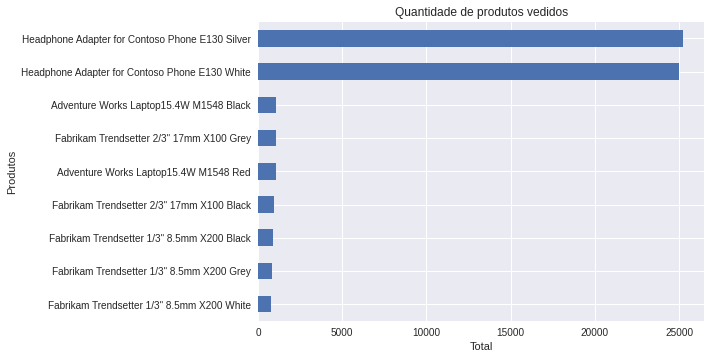

In [38]:
#Gráfico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Quantidade de produtos vedidos")
plt.xlabel("Total")
plt.ylabel("Produtos");

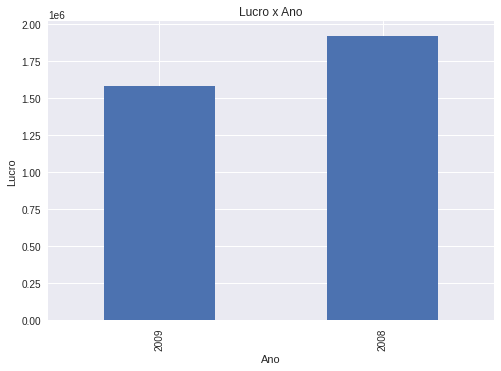

In [46]:
#Gráfico Lucro por Ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().sort_values(ascending=True).plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Lucro");

In [47]:
#Lucro
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().reset_index()

,Data Venda,Lucro
0,2008,"1,920,077.71"
1,2009,"1,577,745.38"


In [52]:
#Filtro Lucro 2009
df_2009 = df[df["Data Venda"].dt.year==2009]

In [54]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


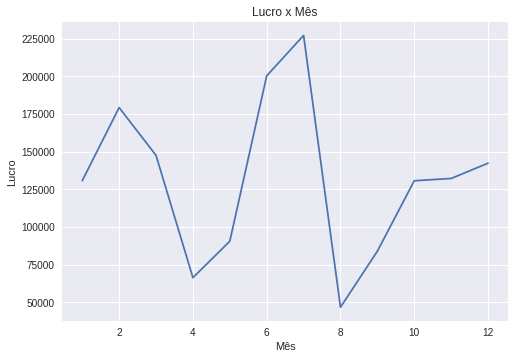

In [58]:
#Gráfico Lucro por mês, no Ano 2009
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

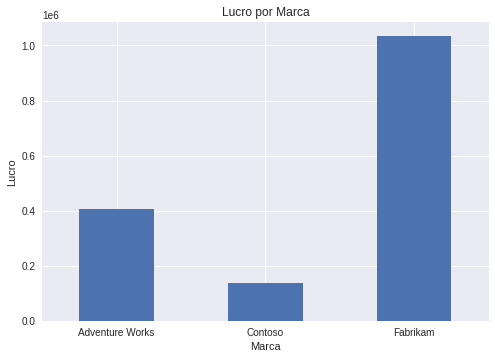

In [64]:
#Gráfico Lucro por marca em 2009
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro por Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal"); #label na horizontal

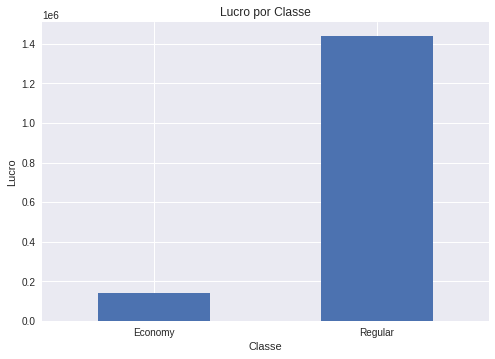

In [65]:
#Gráfico Lucro por classe em 2009
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro por Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal"); #label na horizontal

In [66]:
#Análise estatística
df["Tempo_Envio"].describe()

count   904.00
mean      8.54
std       3.06
min       4.00
25%       6.00
50%       9.00
75%      11.00
max      20.00
Name: Tempo_Envio, dtype: float64

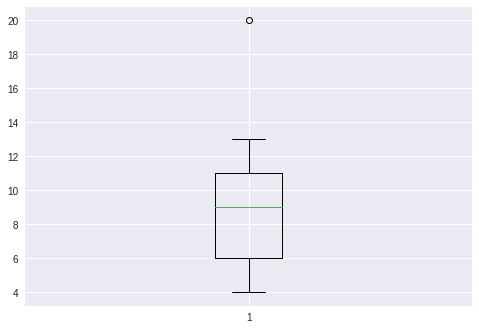

In [68]:
#Gráfico de BoxPlot
plt.boxplot(df["Tempo_Envio"]);

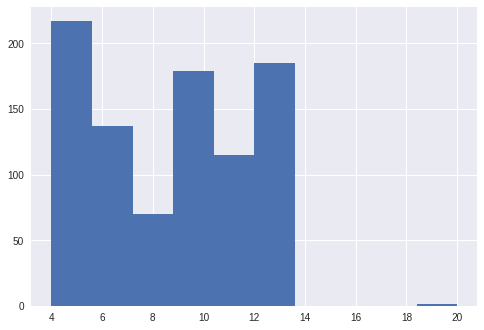

In [69]:
#Histograma
plt.hist(df["Tempo_Envio"]);

In [70]:
#Tempo mínimo de envio
df["Tempo_Envio"].min()

4

In [71]:
#Tempo máximo de envio
df["Tempo_Envio"].max()

20

In [73]:
#Identificando o Outlier
df[df["Tempo_Envio"]==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
